# Bella & Bona Data Analysis Case Study

## Challenge 2

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data sets

order_data = pd.read_excel('Data Analyst Case Study - Datasets.xlsx', sheet_name='order data')
company_data = pd.read_excel('Data Analyst Case Study - Datasets.xlsx', sheet_name='company data')
user_data = pd.read_excel('Data Analyst Case Study - Datasets.xlsx', sheet_name='user data')

### Part I: Capture Rate Calculation

In [3]:
company_data.head()

,Company Name,Contractual Weekdays,Main Dish Price,Employer Contribution,Employee Paid Main Dish Price
0,company1,"[""Monday"", ""Tuesday"", ""Wednesday"", ""Thursday"",...",7.5,7.5,0.0
1,company2,"[""Monday"", ""Tuesday"", ""Wednesday"", ""Thursday"",...",8.5,3.8,4.7
2,company3,"[""Monday"", ""Tuesday"", ""Thursday"", ""Friday"", ""W...",7.5,3.1,4.4
3,company4,"[""Monday"", ""Wednesday""]",7.5,0.0,7.5
4,company5,"[""Monday"", ""Tuesday"", ""Wednesday"", ""Thursday"",...",7.5,0.0,7.5


The company sheet includes a list of contractual weekdays for each company, whose "lenth" should be extracted to be used to calculate capture rate.

In [4]:
# Removing the special characters from the column "Contractual Weekdays"

company_data["Contractual Weekdays"] = company_data["Contractual Weekdays"].replace({'\[': '', '\]': '','\,': '', '\"': ''}, regex = True)

In [5]:
# Converting the elements of the column to indexible lists

company_data["Contractual Weekdays"] = company_data["Contractual Weekdays"].str.split(" ", expand = False)

In [6]:
# Testing the column's structure (The very first day of the very first row, should yield Monday)

company_data["Contractual Weekdays"][0][0]

'Monday'

Well, now that we converted strings to lists, we can get their length as well and append it to the table as a new column.

In [7]:
# New column: Number of contractual weekdays

company_data["Num. of Cont. Days"] = company_data["Contractual Weekdays"].apply(len)
company_data.head()

,Company Name,Contractual Weekdays,Main Dish Price,Employer Contribution,Employee Paid Main Dish Price,Num. of Cont. Days
0,company1,"[Monday, Tuesday, Wednesday, Thursday, Friday]",7.5,7.5,0.0,5
1,company2,"[Monday, Tuesday, Wednesday, Thursday, Friday]",8.5,3.8,4.7,5
2,company3,"[Monday, Tuesday, Thursday, Friday, Wednesday]",7.5,3.1,4.4,5
3,company4,"[Monday, Wednesday]",7.5,0.0,7.5,2
4,company5,"[Monday, Tuesday, Wednesday, Thursday, Friday]",7.5,0.0,7.5,5


In [8]:
# Subsetting the data (keeping the relevant columns only)

table_1 = order_data[["Company Name", "Email", "Week of deliveryDate (deliverydata)", "Day of deliveryDate (deliverydata)"]]

In [9]:
# New column: Number of weekdays that an order is delivered by each customer, weekly

table_1 = table_1.groupby(["Company Name",
                           "Email",
                           "Week of deliveryDate (deliverydata)"])["Day of deliveryDate (deliverydata)"].nunique().reset_index(name="Num. of Orders")
table_1.head()

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders
0,company1,g.gumugwaukw@company1.com,Week 5,1
1,company1,g.gumugwaukw@company1.com,Week 6,3
2,company1,g.gumugwaukw@company1.com,Week 7,3
3,company1,g.gumugwaukw@company1.com,Week 8,4
4,company1,g.gumugwaukw@company1.com,Week 9,1


In [10]:
# Merging the companies' number of contractual weekdays to the table

table_1 = table_1.merge(company_data[["Company Name", "Num. of Cont. Days", "Employee Paid Main Dish Price"]], on="Company Name", how="left")
table_1.head()

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price
0,company1,g.gumugwaukw@company1.com,Week 5,1,5,0.0
1,company1,g.gumugwaukw@company1.com,Week 6,3,5,0.0
2,company1,g.gumugwaukw@company1.com,Week 7,3,5,0.0
3,company1,g.gumugwaukw@company1.com,Week 8,4,5,0.0
4,company1,g.gumugwaukw@company1.com,Week 9,1,5,0.0


Since we are finished with gathering the ingredients, it is time to calculate capture rate as follows:  
  
  
$$
\begin{aligned}
\frac{\text{Number of Orders}}{\text{Number of Contractual Days}}\times100
\end{aligned}
$$

In [11]:
# New column: Capture Rate (user level, weekly)

table_1["Capture Rate"] = table_1["Num. of Orders"] / table_1["Num. of Cont. Days"] * 100

table_1.head()

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate
0,company1,g.gumugwaukw@company1.com,Week 5,1,5,0.0,20.0
1,company1,g.gumugwaukw@company1.com,Week 6,3,5,0.0,60.0
2,company1,g.gumugwaukw@company1.com,Week 7,3,5,0.0,60.0
3,company1,g.gumugwaukw@company1.com,Week 8,4,5,0.0,80.0
4,company1,g.gumugwaukw@company1.com,Week 9,1,5,0.0,20.0


In [12]:
# Capture Rate (user level, monthly)

cr_user_m = table_1.groupby('Email')['Capture Rate'].mean()
cr_user_m.head()

Email
Ggwwmawa.utwwtt@company10.com    33.333333
Guautaw.wggu@company37.com       50.000000
Gumwwguma.wgma@company6.com      20.000000
Guwwuu.wawwmguu@company10.com    33.333333
J.kwuww@company4.com             50.000000
Name: Capture Rate, dtype: float64

In [13]:
# Capture Rate (company level, weekly)

cr_company_w = table_1.groupby(['Company Name', "Week of deliveryDate (deliverydata)"])['Capture Rate'].mean()
cr_company_w.head()

Company Name  Week of deliveryDate (deliverydata)
company1      Week 5                                 40.000000
              Week 6                                 38.000000
              Week 7                                 40.000000
              Week 8                                 48.000000
              Week 9                                 26.666667
Name: Capture Rate, dtype: float64

In [14]:
# Capture Rate (company level, monthly)

cr_company_m = table_1.groupby('Company Name')['Capture Rate'].mean()
cr_company_m.head()

Company Name
company1     39.523810
company10    51.540616
company11    34.883721
company12    58.461538
company13    69.117647
Name: Capture Rate, dtype: float64

### Part II: Correlation Analysis

In [15]:
table_2 = company_data[["Company Name", "Employee Paid Main Dish Price"]].merge(cr_company_m, on="Company Name")
table_2 = table_2.sort_values(by=['Employee Paid Main Dish Price'])

In [16]:
# Correlation matrix of the weekly capture rates

table_1.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\2848919669.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table_1.corr().style.background_gradient(cmap='coolwarm').set_precision(3)
C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\2848919669.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  table_1.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


,Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate
Num. of Orders,1.000,0.353,0.053,0.494
Num. of Cont. Days,0.353,1.000,0.336,-0.597
Employee Paid Main Dish Price,0.053,0.336,1.000,-0.185
Capture Rate,0.494,-0.597,-0.185,1.000


In [17]:
# Correlation matrix of the monthly capture rates
# (Calculated with Pearson correlation coefficient)

table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\3497911579.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)
C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\3497911579.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)


,Employee Paid Main Dish Price,Capture Rate
Employee Paid Main Dish Price,1.000,-0.174
Capture Rate,-0.174,1.000


The correlation coefficient takes a value between 0.1 and 0.3 in both cases, which indicates that there is a correlation between end-user price and capture rate, yet it is not that strong. Notice that the value is negative since end-user price and capture rate are inversely proportional, as can be expected.

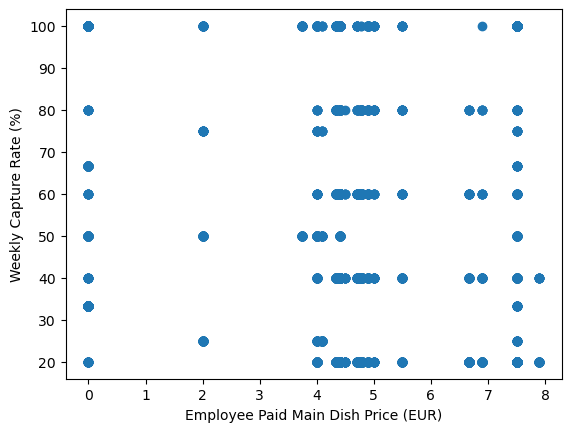

In [18]:
# Scatter plot of the weekly capture rates

plt.scatter(table_1["Employee Paid Main Dish Price"], table_1["Capture Rate"])
plt.xlabel("Employee Paid Main Dish Price (EUR)")
plt.ylabel("Weekly Capture Rate (%)")
plt.show()

The scatter plot clearly shows some segments of the end-user price range: no payments, 2 EUR, 4-5.5 EUR, and more than 6.5 EUR. In each group, there is no significantly dominating capture rate percentage and observations are balanced, taking values between 20% and 100%.

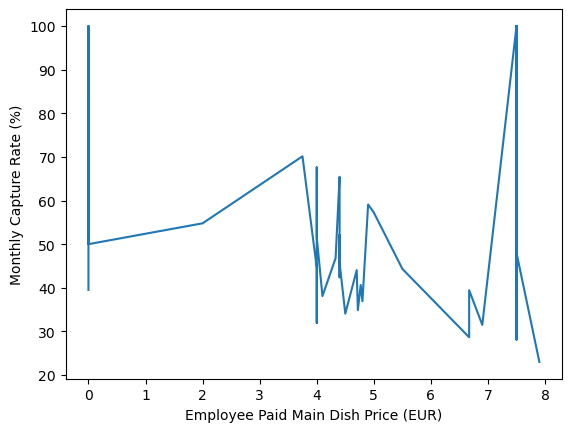

In [19]:
# Line chart of the monthly capture rates

plt.plot(table_2["Employee Paid Main Dish Price"], table_2["Capture Rate"])
plt.xlabel("Employee Paid Main Dish Price (EUR)")
plt.ylabel("Monthly Capture Rate (%)")
plt.show()

When it comes to the line chart of the monthly averages, again, there is no significant trend. Interestingly, there is a peak in 7.5 EUR, which is one of the highest prices an employee can pay. Finally, we can take a look at the monthly capture rates table:

In [20]:
table_2

,Company Name,Employee Paid Main Dish Price,Capture Rate
0,company1,0.00,39.523810
28,company29,0.00,84.848485
41,company42,0.00,64.000000
9,company10,0.00,51.540616
6,company7,0.00,100.000000
13,company14,0.00,100.000000
26,company27,0.00,50.000000
8,company9,2.00,54.777070
20,company21,3.75,70.129870
40,company41,4.00,44.571429


Since there is only one company whose monthly capture rate is lower than 50%, we can conclude that free meals contribute significantly to capture rate. On the other side, price is not that significant when the meal is paid, as there are good capture rates at high prices as well. However, this claim must be investigated further since this study is held considering only one-month data.

With the data we have, we can put forward one final argument by adding a new binary feature that indicates whether the meal is free.

In [21]:
# New column: Is the meal free for the end-customer?

table_2["Free Meal"] = np.where(table_2['Employee Paid Main Dish Price'] == 0, 1, 0)
table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\621796198.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)
C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\621796198.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  table_2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)


,Employee Paid Main Dish Price,Capture Rate,Free Meal
Employee Paid Main Dish Price,1.000,-0.174,-0.817
Capture Rate,-0.174,1.000,0.321
Free Meal,-0.817,0.321,1.000


This time, the correlation coefficient takes a larger value (Pearson correlation coefficient values between 0.3 and 0.5 are considered as medium-level correlation), which is a considerable evidence that offering free meals is more important than discounts.

### Part III: Assessing Other Factors

In [22]:
table_1

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate
0,company1,g.gumugwaukw@company1.com,Week 5,1,5,0.0,20.0
1,company1,g.gumugwaukw@company1.com,Week 6,3,5,0.0,60.0
2,company1,g.gumugwaukw@company1.com,Week 7,3,5,0.0,60.0
3,company1,g.gumugwaukw@company1.com,Week 8,4,5,0.0,80.0
4,company1,g.gumugwaukw@company1.com,Week 9,1,5,0.0,20.0
...,...,...,...,...,...,...,...
5046,company9,wwwwwmguazkugawwaw@company9.com,Week 8,4,4,2.0,100.0
5047,company9,wwwwwmguazkugawwaw@company9.com,Week 9,2,4,2.0,50.0
5048,company9,wzwmawwmu@company9.com,Week 5,1,4,2.0,25.0
5049,company9,wzwmawwmu@company9.com,Week 6,2,4,2.0,50.0


In [23]:
order_data.head()

,Order Id,Email,Company Name,DishType,orderId (deliverydata),Dish Name,Type (Recipe Variants),diet,Quantity,Year of placedAt (orders),...,Week of placedAt (orders),Year of deliveryDate (deliverydata),Month of deliveryDate (deliverydata),Day of deliveryDate (deliverydata),deliveryDate (deliverydata),Week of deliveryDate (deliverydata),Rating,Satisfaction,Taste,Delivery
0,9f315c01-f7bc-46b6-9cbb-6fac0644e27f,g.gumugwaukw@company1.com,company1,Main Dish,9f315c01-f7bc-46b6-9cbb-6fac0644e27f,Lasagna Ligure,hot,vegetarian,1,2023,...,Week 5,2023,2,3,2023-02-03,Week 5,NaN,NaN,NaN,NaN
1,55d6f8db-c994-43a3-88da-ccaaeb14c448,g.gumugwaukw@company1.com,company1,Main Dish,55d6f8db-c994-43a3-88da-ccaaeb14c448,Roasted chicken with Potatoes and Speck,hot,meat,1,2023,...,Week 7,2023,2,14,2023-02-14,Week 7,NaN,NaN,NaN,NaN
2,82e0163f-35ce-4f56-8d50-f4a9fe2ab168,g.gumugwaukw@company1.com,company1,Main Dish,82e0163f-35ce-4f56-8d50-f4a9fe2ab168,Herakleio's Vegan Pita Gyros,cold,vegan,1,2023,...,Week 8,2023,2,23,2023-02-23,Week 8,NaN,NaN,NaN,NaN
3,084cf85e-f703-43f8-bec5-54d985d38eb1,g.gumugwaukw@company1.com,company1,Main Dish,084cf85e-f703-43f8-bec5-54d985d38eb1,Vegan Currywurst,hot,vegan,1,2023,...,Week 8,2023,2,27,2023-02-27,Week 9,NaN,NaN,NaN,NaN
4,20846cc2-415f-4ff1-a6dd-b83e2b85c613,g.gumugwaukw@company1.com,company1,Main Dish,20846cc2-415f-4ff1-a6dd-b83e2b85c613,Chicken with Leipziger Allerlei and rösti,hot,meat,1,2023,...,Week 6,2023,2,9,2023-02-09,Week 6,NaN,NaN,NaN,NaN


In [24]:
# New columns: Monthly user feedback averages

table_3 = table_1.merge(order_data.groupby('Email')['Rating'].mean(), on="Email", how="left")
table_3 = table_3.merge(order_data.groupby('Email')['Satisfaction'].mean(), on="Email", how="left")
table_3 = table_3.merge(order_data.groupby('Email')['Taste'].mean(), on="Email", how="left")
table_3 = table_3.merge(order_data.groupby('Email')['Delivery'].mean(), on="Email", how="left")
table_3.head()

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate,Rating,Satisfaction,Taste,Delivery
0,company1,g.gumugwaukw@company1.com,Week 5,1,5,0.0,20.0,8.285714,8.428571,8.285714,10.0
1,company1,g.gumugwaukw@company1.com,Week 6,3,5,0.0,60.0,8.285714,8.428571,8.285714,10.0
2,company1,g.gumugwaukw@company1.com,Week 7,3,5,0.0,60.0,8.285714,8.428571,8.285714,10.0
3,company1,g.gumugwaukw@company1.com,Week 8,4,5,0.0,80.0,8.285714,8.428571,8.285714,10.0
4,company1,g.gumugwaukw@company1.com,Week 9,1,5,0.0,20.0,8.285714,8.428571,8.285714,10.0


In [25]:
# New column: Company size (Probably ignoring non-B&B user employees, but still might give an insight about company sizes)

table_3 = table_3.merge(user_data.groupby(["Company Name"])["Email"].nunique().reset_index(name="Num. of Employees"), on="Company Name", how="left")
table_3.head()

,Company Name,Email,Week of deliveryDate (deliverydata),Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate,Rating,Satisfaction,Taste,Delivery,Num. of Employees
0,company1,g.gumugwaukw@company1.com,Week 5,1,5,0.0,20.0,8.285714,8.428571,8.285714,10.0,20
1,company1,g.gumugwaukw@company1.com,Week 6,3,5,0.0,60.0,8.285714,8.428571,8.285714,10.0,20
2,company1,g.gumugwaukw@company1.com,Week 7,3,5,0.0,60.0,8.285714,8.428571,8.285714,10.0,20
3,company1,g.gumugwaukw@company1.com,Week 8,4,5,0.0,80.0,8.285714,8.428571,8.285714,10.0,20
4,company1,g.gumugwaukw@company1.com,Week 9,1,5,0.0,20.0,8.285714,8.428571,8.285714,10.0,20


In [26]:
# Checking the correlation matrix

table_3.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\236254570.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table_3.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)
C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\236254570.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  table_3.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(3)


,Num. of Orders,Num. of Cont. Days,Employee Paid Main Dish Price,Capture Rate,Rating,Satisfaction,Taste,Delivery,Num. of Employees
Num. of Orders,1.000,0.353,0.053,0.494,0.062,0.032,0.064,-0.015,0.066
Num. of Cont. Days,0.353,1.000,0.336,-0.597,0.068,0.066,0.115,-0.073,0.205
Employee Paid Main Dish Price,0.053,0.336,1.000,-0.185,-0.009,-0.050,-0.003,-0.070,-0.118
Capture Rate,0.494,-0.597,-0.185,1.000,-0.014,-0.049,-0.062,0.036,-0.127
Rating,0.062,0.068,-0.009,-0.014,1.000,0.838,0.851,0.526,0.013
Satisfaction,0.032,0.066,-0.050,-0.049,0.838,1.000,0.902,0.632,0.041
Taste,0.064,0.115,-0.003,-0.062,0.851,0.902,1.000,0.552,0.023
Delivery,-0.015,-0.073,-0.070,0.036,0.526,0.632,0.552,1.000,0.007
Num. of Employees,0.066,0.205,-0.118,-0.127,0.013,0.041,0.023,0.007,1.000


According to the above results, user feedbacks seem like irrelevant, all of which have a magnitude near zero. This probably stems from the fact that many users do not take their times to give ratings, and consequently one-month data becomes inadequate. A possibly useful modification can be narrowing down the scale from 1-20 to 1-5, which would reflect the users' satisfaction better in small sample sizes.

On the other hand, company size's coefficient has a higher magnitude compared to the feedbacks, yet its correlation (-0.127) is still weak.

The feature with the highest correlation with capture rate is the number of contractual days, which has a negative coefficient equal to almost 0.6. It is inversely proportional with the capture rate, which can be interpreted as follows: End-users who have fewer opportunities per week to eat B&B meals have a higher tendency to benefit from these opportunities.

At the first glance, offering the most frequent deliveries possible to the businesses might seem like a good idea to maximize profits. Considering the last outcome (the inverse proportionality of capture rate and frequency), reassessing the negotiation strategy might be helpful. For example, an optimum number of weekly deliveries can be determined (such as 2 or 3 days a week), and this number can be used as a first offer.

This would decrease the total profit in the short-term for sure. But as a long-term strategy it can be helpful when supported with a second strategy: Working with more companies. Focusing on increasing the number of businesses served instead of number of days served would probably yield better results. To exemplify, serving 5 companies 3 days a week would probably be better than serving 3 companies for 5 days a week, in terms of capture rate, of course.

The below table supports this idea.

In [27]:
# Table: Capture rate averages for each frequency

table_3.groupby("Num. of Cont. Days")["Capture Rate"].mean()

Num. of Cont. Days
1    100.000000
2     68.763557
3     51.823579
4     49.626866
5     42.561670
Name: Capture Rate, dtype: float64

### Part IV: Modeling

In [28]:
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [31]:
# Preparing a clean table before train-test split with the columns to be assessed and the target column

# Company Name, End-user Price, Frequency
table_4 = company_data[["Company Name", "Employee Paid Main Dish Price", "Num. of Cont. Days"]]
# Company Size
table_4 = table_4.merge(user_data.groupby("Company Name")["Email"].nunique().reset_index(name="Num. of Employees"), on="Company Name", how="left")
# Rating
table_4 = table_4.merge(order_data.groupby('Company Name')['Rating'].mean(), on="Company Name", how="left")
# Satisfaction
table_4 = table_4.merge(order_data.groupby('Company Name')['Satisfaction'].mean(), on="Company Name", how="left")
# Taste
table_4 = table_4.merge(order_data.groupby('Company Name')['Taste'].mean(), on="Company Name", how="left")
# Delivery
table_4 = table_4.merge(order_data.groupby('Company Name')['Delivery'].mean(), on="Company Name", how="left")
# Is Free?
table_4["Free Meal"] = np.where(table_4['Employee Paid Main Dish Price'] == 0, 1, 0)
# Weekly capture rate
week_9_dropped = table_1.drop(table_1[table_1['Week of deliveryDate (deliverydata)'] == 'Week 9'].index)
week_9_dropped = week_9_dropped.groupby(["Company Name", "Week of deliveryDate (deliverydata)"])["Capture Rate"].mean()
table_4 = table_4.merge(week_9_dropped, on="Company Name", how="right")
# Company name is not required from this line on
table_4 = table_4.drop(['Company Name'], axis=1)

table_4.head()

,Employee Paid Main Dish Price,Num. of Cont. Days,Num. of Employees,Rating,Satisfaction,Taste,Delivery,Free Meal,Capture Rate
0,0.0,5,20,8.222222,8.625000,8.500000,9.625000,1,40.000000
1,0.0,5,20,8.222222,8.625000,8.500000,9.625000,1,38.000000
2,0.0,5,20,8.222222,8.625000,8.500000,9.625000,1,40.000000
3,0.0,5,20,8.222222,8.625000,8.500000,9.625000,1,48.000000
4,0.0,3,133,7.717647,8.231884,7.521739,10.264706,1,54.222222


Note that we have dropped the rows that belong  to Week 9, since this week consists of only two days (27 and 28th of February), causing a bias in the averages. The following table shows how capture rate average is inconsistent in these rows.

In [29]:
table_1.groupby('Week of deliveryDate (deliverydata)')['Capture Rate'].mean()

Week of deliveryDate (deliverydata)
Week 5    54.470272
Week 6    56.429207
Week 7    56.186957
Week 8    55.957854
Week 9    38.352941
Name: Capture Rate, dtype: float64

In [32]:
table_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Employee Paid Main Dish Price  170 non-null    float64
 1   Num. of Cont. Days             170 non-null    int64  
 2   Num. of Employees              170 non-null    int64  
 3   Rating                         166 non-null    float64
 4   Satisfaction                   162 non-null    float64
 5   Taste                          162 non-null    float64
 6   Delivery                       162 non-null    float64
 7   Free Meal                      170 non-null    int32  
 8   Capture Rate                   170 non-null    float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 12.6 KB


In [33]:
table_4.describe()

,Employee Paid Main Dish Price,Num. of Cont. Days,Num. of Employees,Rating,Satisfaction,Taste,Delivery,Free Meal,Capture Rate
count,170.000000,170.000000,170.000000,166.000000,162.000000,162.000000,162.000000,170.000000,170.000000
mean,4.702000,3.935294,40.958824,7.811812,7.859977,7.683819,9.572922,0.158824,56.971689
std,2.519293,1.480221,36.964617,1.063717,1.370835,1.215639,1.048268,0.366591,21.786017
min,0.000000,1.000000,2.000000,5.000000,2.750000,4.000000,7.571429,0.000000,20.000000
25%,4.000000,3.000000,14.000000,7.371212,7.291667,7.000000,8.666667,0.000000,41.615385
50%,4.700000,5.000000,34.000000,7.717647,8.071429,7.678571,9.833333,0.000000,50.555556
75%,7.500000,5.000000,46.000000,8.490809,8.657895,8.500000,10.050000,0.000000,69.270833
max,7.900000,5.000000,195.000000,10.000000,9.875000,9.875000,13.000000,1.000000,100.000000


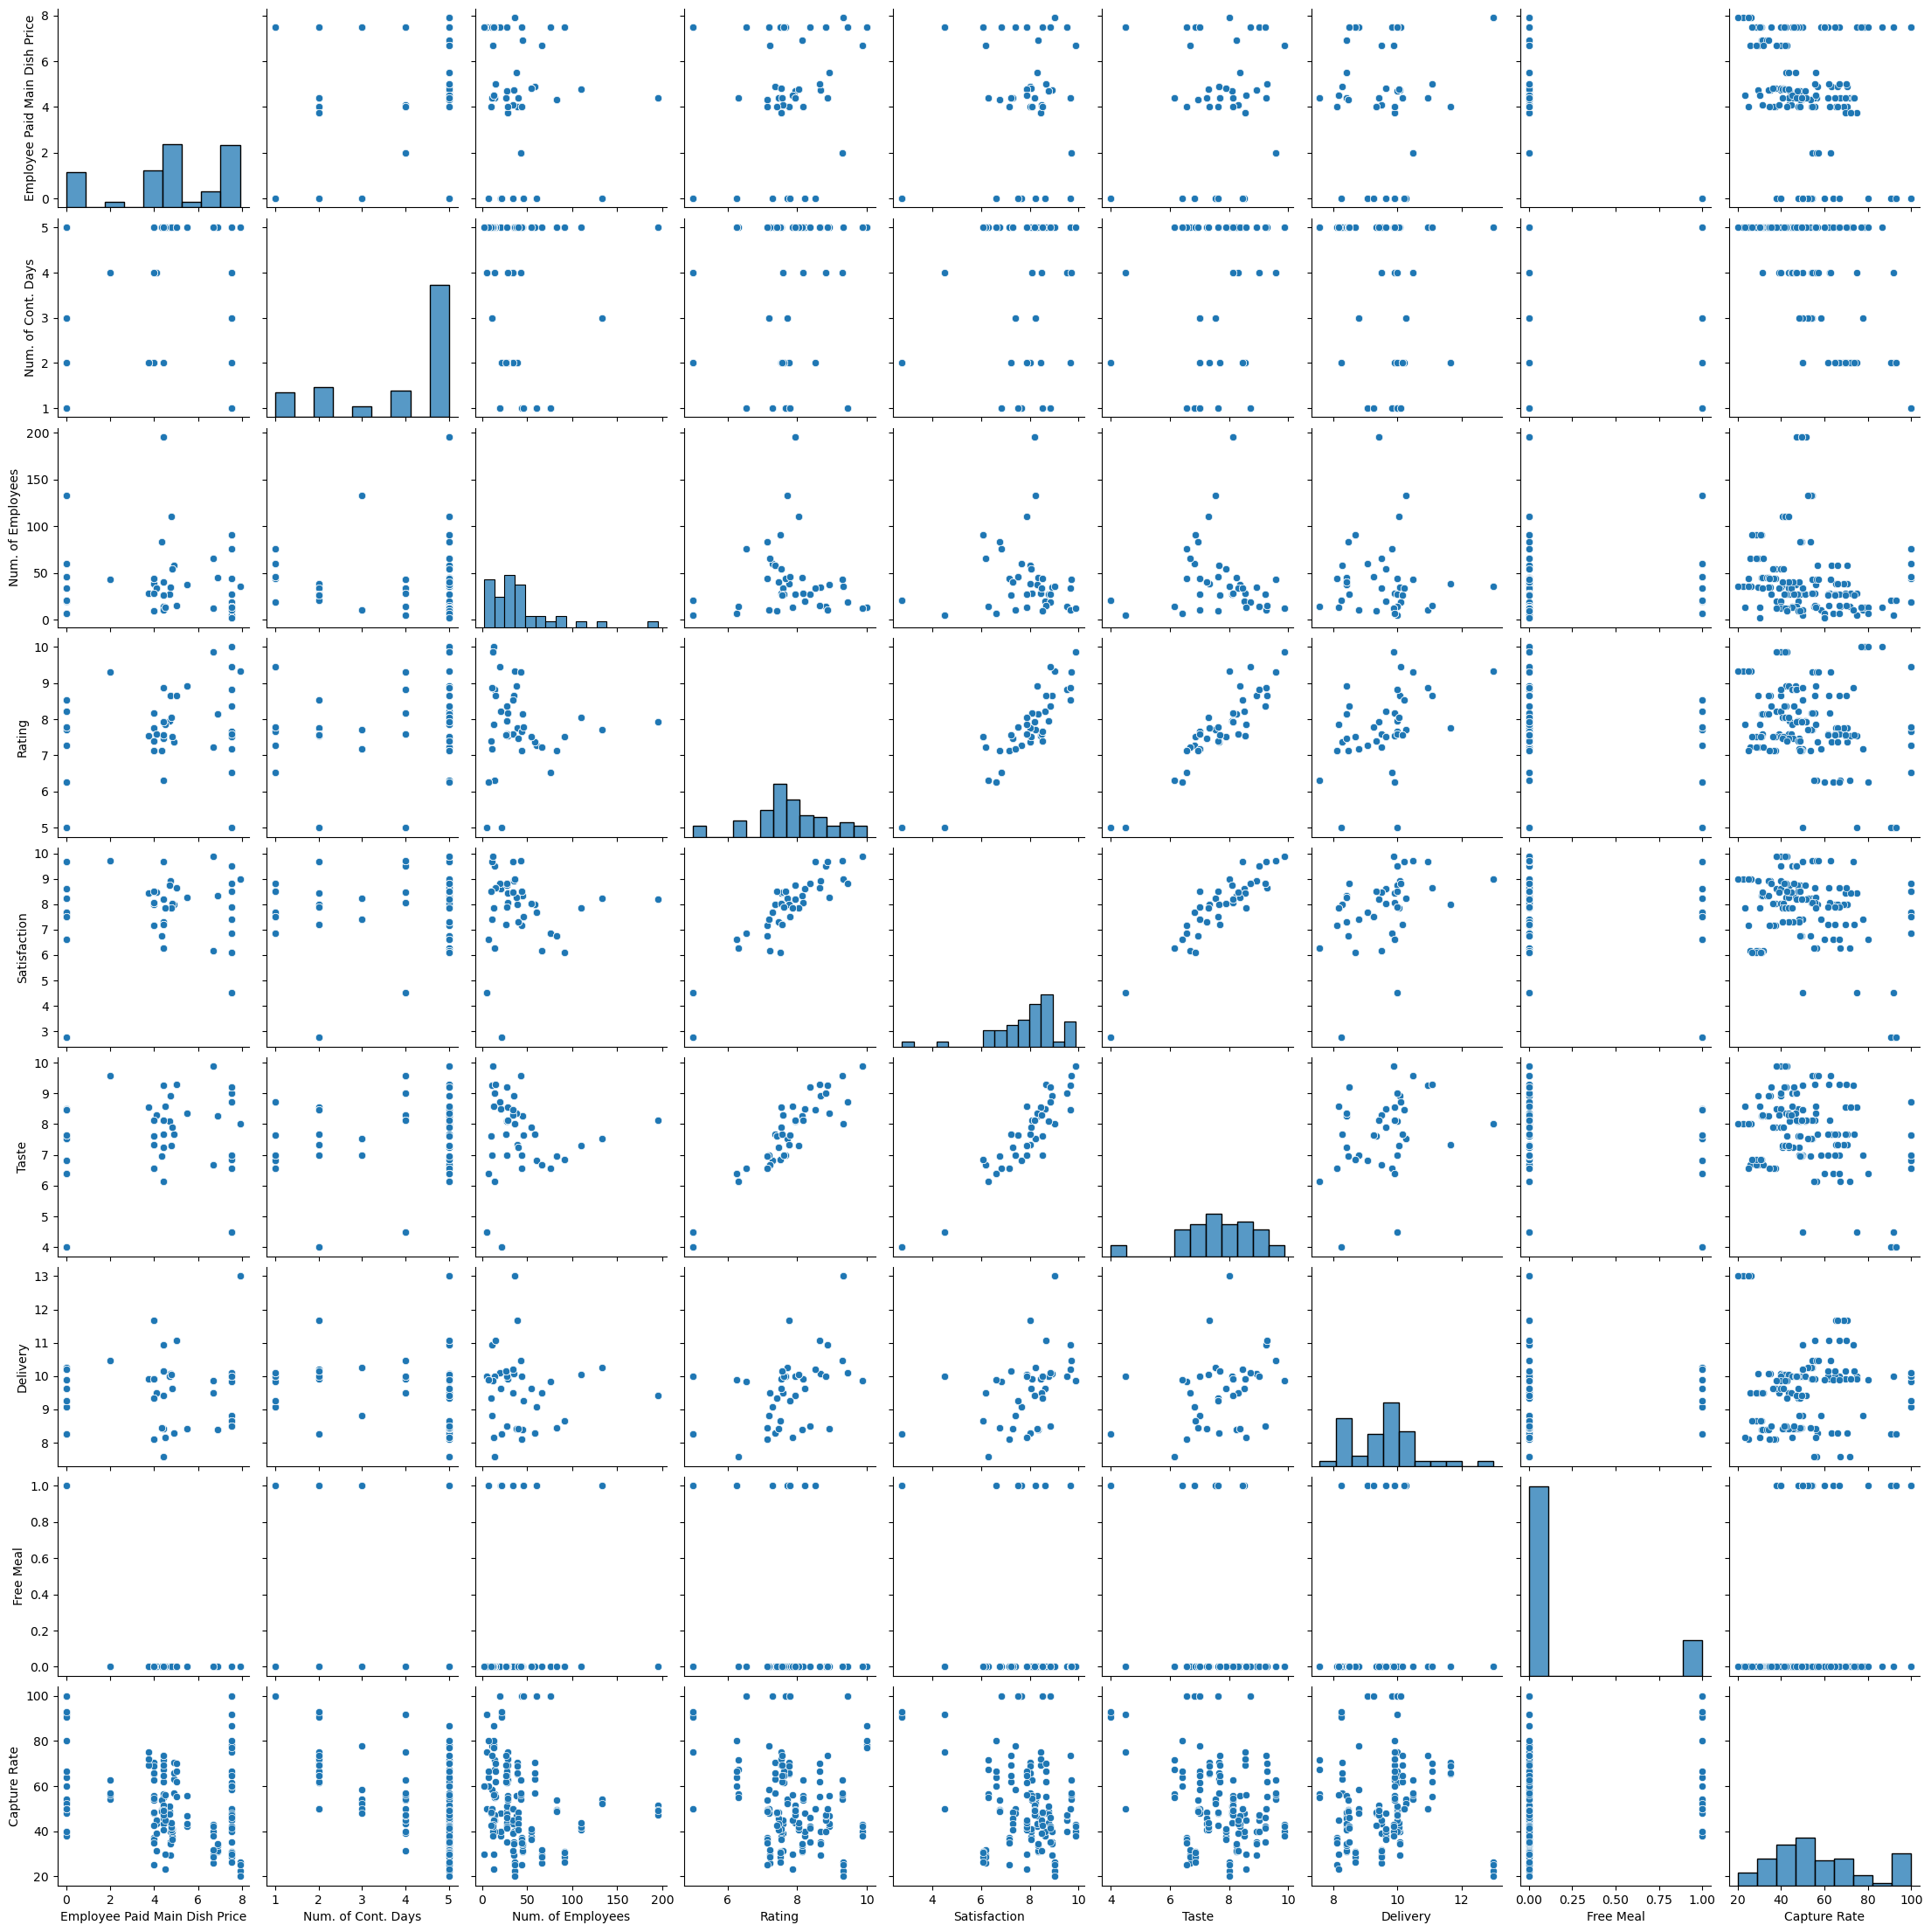

In [34]:
sns.pairplot(table_4)

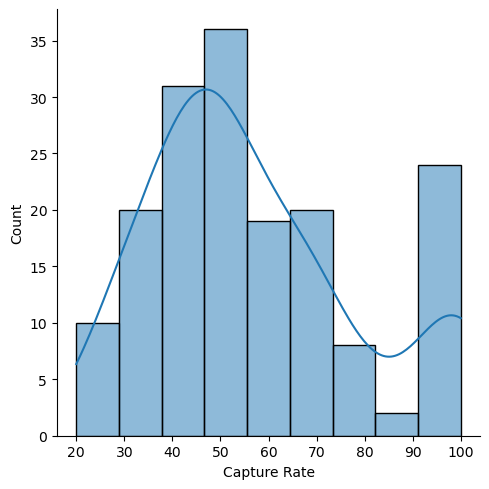

In [35]:
sns.displot(table_4["Capture Rate"], kde=True)

<AxesSubplot: >

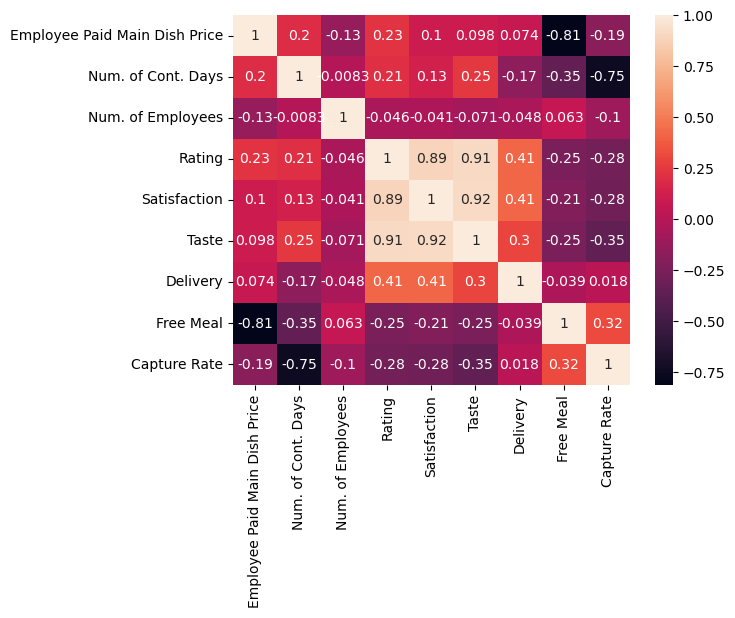

In [36]:
sns.heatmap(table_4.corr(), annot=True)

Model I: Linear Regression

In [37]:
table_5 = table_4[['Employee Paid Main Dish Price', 'Num. of Cont. Days', 'Free Meal', 'Rating', 'Satisfaction', 'Taste', 'Capture Rate']].dropna()
X = table_5.drop(['Capture Rate'], axis=1)
y = table_5['Capture Rate']

In [38]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

143.94340466054786


In [41]:
pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

,Coefficient
Employee Paid Main Dish Price,-0.987318
Num. of Cont. Days,-11.854722
Free Meal,-6.167521
Rating,-6.474924
Satisfaction,-2.080462
Taste,4.022314


In [42]:
predictions_1 = lm.predict(X_test)

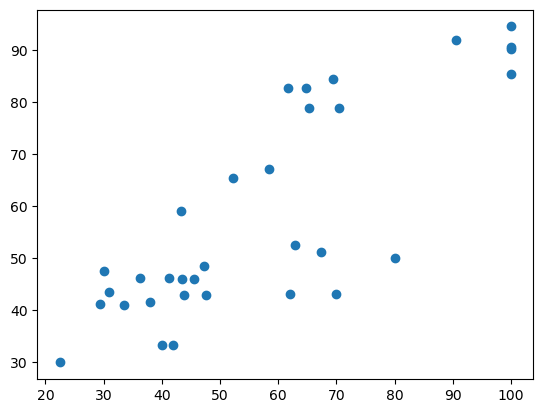

In [43]:
plt.scatter(y_test, predictions_1)

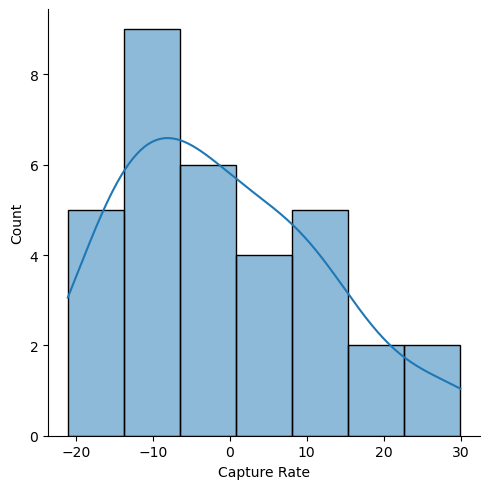

In [44]:
sns.displot(y_test - predictions_1, kde=True)

In [45]:
# MAE

metrics.mean_absolute_error(y_test, predictions_1)

10.827508939350276

In [46]:
# RMSE

np.sqrt(metrics.mean_squared_error(y_test, predictions_1))

12.943877812889221

In [47]:
metrics.mean_absolute_percentage_error(y_test, predictions_1)

0.20691885964843956

Model II: Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)

In [50]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [51]:
predictions_2 = rf.predict(X_test)

In [52]:
metrics.mean_absolute_error(y_test, predictions_2)

3.703734670812414

In [53]:
np.sqrt(metrics.mean_squared_error(y_test, predictions_2))

5.4366629988575585

In [54]:
metrics.mean_absolute_percentage_error(y_test, predictions_2)

0.07669321459652612

In [62]:
# Feature Importance (More feature engineering needed for this to be useful)

#sorted_idx = rf.feature_importances_.argsort()
#plt.barh(rf.feature_names_in_[sorted_idx], rf.feature_importances_[sorted_idx])
#plt.xlabel("Random Forest Feature Importance")

### Part V:

- "Is Free?" column contributes well. More custom features can be engineered.
- Holidays in Germany and other special days can be introduced as a column. (For exemple Ramadan, during which Muslims fast.)
- In addition, separate analysis for each diet type can be held. 

### Part VI:

In [207]:
company_a = pd.read_excel('test_data.xlsx', sheet_name='company_a')
company_b = pd.read_excel('test_data.xlsx', sheet_name='company_b')
company_c = pd.read_excel('test_data.xlsx', sheet_name='company_c')

In [208]:
table_6 = table_4[['Employee Paid Main Dish Price', 'Num. of Cont. Days', 'Free Meal', 'Capture Rate']].dropna()
X = table_6.drop(['Capture Rate'], axis=1)
y = table_6['Capture Rate']

In [209]:
X_train = X
y_train = y

In [210]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)

In [211]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [212]:
def modify_test_set(company_data):

    company_data = company_data.transpose()
    company_data = company_data.iloc[1:]
    company_data.columns = ["Company Size", "Num. of Cont. Days", "Nominal Price", "Employer Contribution", "Employee Paid Main Dish Price"]
    company_data["Free Meal"] = np.where(company_data['Employee Paid Main Dish Price'] == 0, 1, 0)
    return(company_data)

In [213]:
company_a = modify_test_set(company_a)
company_b = modify_test_set(company_b)
company_c = modify_test_set(company_c)

In [214]:
company_a_test = company_a.iloc[:, [4, 1, 5]]
company_b_test = company_b.iloc[:, [4, 1, 5]]
company_c_test = company_c.iloc[:, [4, 1, 5]]

In [215]:
predictions_a = rf.predict(company_a_test)
company_a["Prediction (Weekly CR)"] = predictions_a
company_a["Prediction (Monthly Revenue)"] = 4.2*company_a["Nominal Price"]*company_a["Company Size"]*company_a["Num. of Cont. Days"]*company_a["Prediction (Weekly CR)"]/100
company_a

,Company Size,Num. of Cont. Days,Nominal Price,Employer Contribution,Employee Paid Main Dish Price,Free Meal,Prediction (Weekly CR),Prediction (Monthly Revenue)
Scenario 1,30.0,4.0,7.9,0.0,7.9,0,42.125683,1677.276207
Scenario 2,30.0,4.0,7.9,2.0,5.9,0,57.709531,2297.762705
Scenario 3,30.0,4.0,7.9,4.0,3.9,0,55.619439,2214.543603
Scenario 4,30.0,4.0,7.9,6.0,1.9,0,57.549393,2291.386617
Scenario 5,30.0,4.0,7.9,7.9,0.0,1,55.312690,2202.330059


In [216]:
predictions_b = rf.predict(company_b_test)
company_b["Prediction (Weekly CR)"] = predictions_b
company_b["Prediction (Monthly Revenue)"] = 4.2*company_b["Nominal Price"]*company_b["Company Size"]*company_b["Num. of Cont. Days"]*company_b["Prediction (Weekly CR)"]/100
company_b

,Company Size,Num. of Cont. Days,Nominal Price,Employer Contribution,Employee Paid Main Dish Price,Free Meal,Prediction (Weekly CR),Prediction (Monthly Revenue)
Scenario 1,40.0,2.0,7.9,0.0,7.9,0,64.127605,1702.203148
Scenario 2,40.0,2.0,7.9,2.0,5.9,0,67.435241,1790.001042
Scenario 3,40.0,2.0,7.9,4.0,3.9,0,67.498056,1791.668387
Scenario 4,40.0,2.0,7.9,6.0,1.9,0,72.174755,1915.806709
Scenario 5,40.0,2.0,7.9,7.9,0.0,1,73.790737,1958.701313


In [217]:
predictions_c = rf.predict(company_c_test)
company_c["Prediction (Weekly CR)"] = predictions_c
company_c["Prediction (Monthly Revenue)"] = 4.2*company_c["Nominal Price"]*company_c["Company Size"]*company_c["Num. of Cont. Days"]*company_c["Prediction (Weekly CR)"]/100
company_c

,Company Size,Num. of Cont. Days,Nominal Price,Employer Contribution,Employee Paid Main Dish Price,Free Meal,Prediction (Weekly CR),Prediction (Monthly Revenue)
Scenario 1,100.0,5.0,7.9,0.0,7.9,0,23.929712,3969.939208
Scenario 2,100.0,5.0,7.9,2.0,5.9,0,46.544270,7721.694439
Scenario 3,401.0,5.0,7.9,4.0,3.9,0,39.944251,26573.272731
Scenario 4,40.0,5.0,7.9,6.0,1.9,0,52.062459,3454.864792
Scenario 5,40.0,5.0,7.9,7.9,0.0,1,55.217127,3664.20852


## Challenge 3

In [218]:
df = order_data.drop(order_data[order_data['Week of deliveryDate (deliverydata)'] == 'Week 9'].index)

In [219]:
df = df.groupby(["deliveryDate (deliverydata)"])["Email"].nunique().reset_index(name="Unique Users")
df.columns = ['Date','Unique Users']

In [220]:
df.head()

,Date,Unique Users
0,2023-01-30,378
1,2023-01-31,449
2,2023-02-01,516
3,2023-02-02,422
4,2023-02-03,231


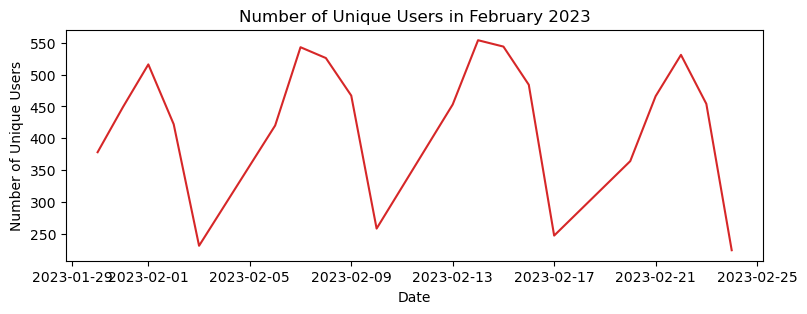

In [221]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Unique Users', dpi=100):
    plt.figure(figsize=(9,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Unique Users'], title='Number of Unique Users in February 2023')

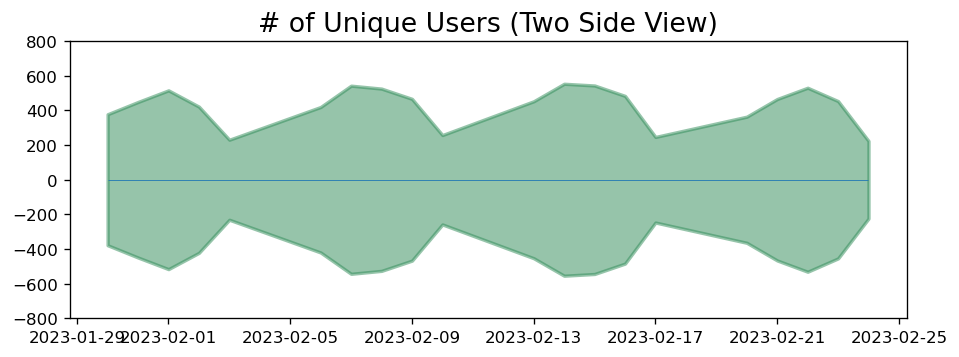

In [222]:
x = df['Date'].values
y1 = df['Unique Users'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(9,3), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('# of Unique Users (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

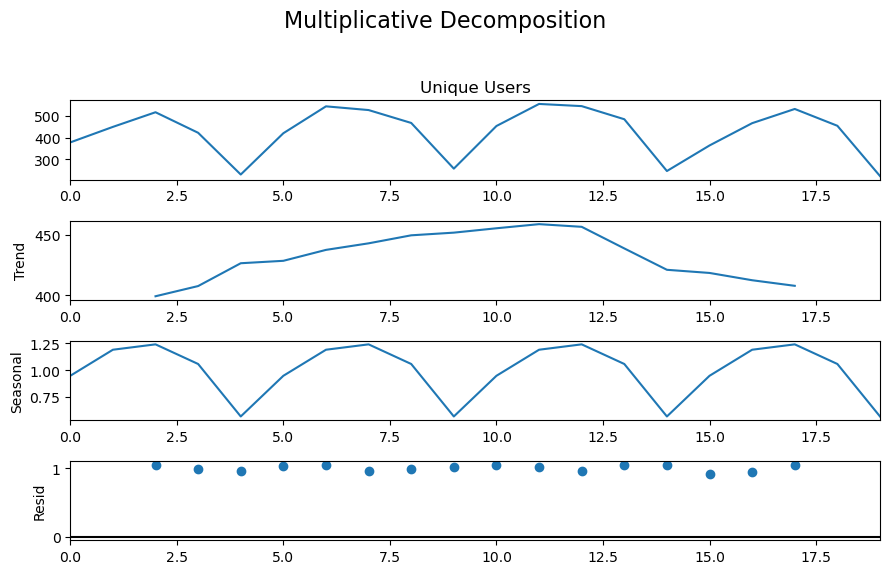

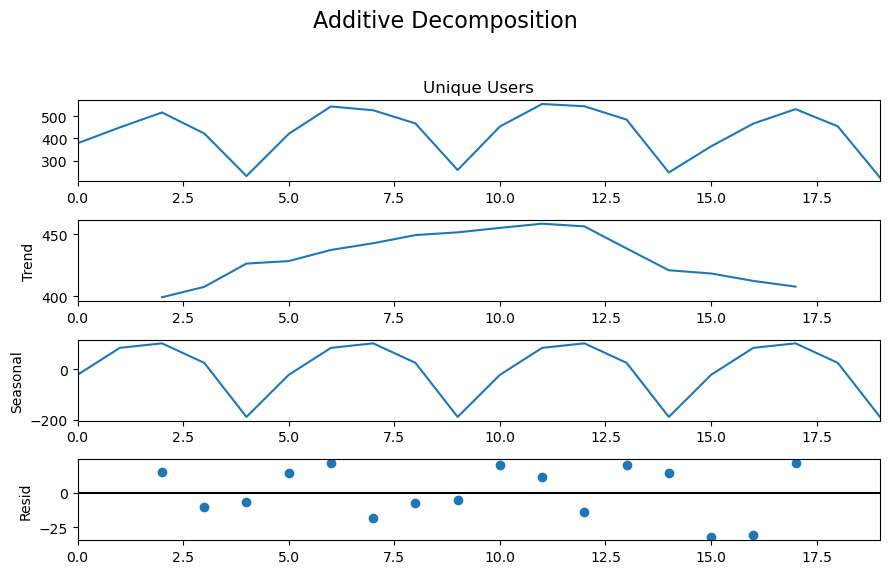

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Unique Users'], model='multiplicative', period=5)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Unique Users'], model='additive', period=5)

# Plot
plt.rcParams.update({'figure.figsize': (9,6)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Seasonality Test

In [224]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

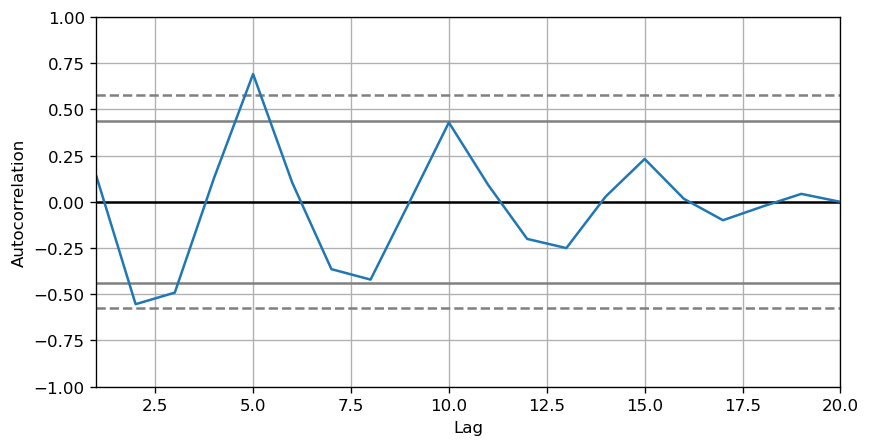

In [225]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
autocorrelation_plot(df['Unique Users'].tolist())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


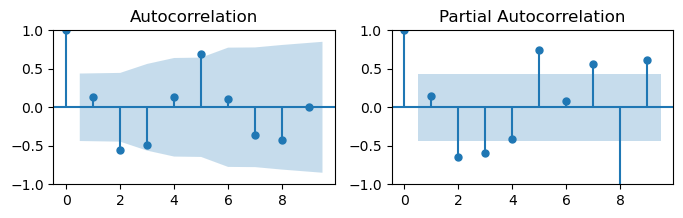

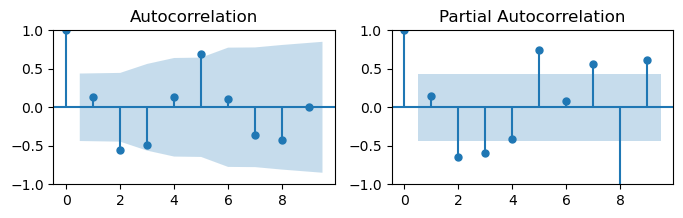

In [226]:
fig, axes = plt.subplots(1,2,figsize=(8,2), dpi= 100)
plot_acf(df['Unique Users'].tolist(), lags=9, ax=axes[0])
plot_pacf(df['Unique Users'].tolist(), lags=9, ax=axes[1])

In [227]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [228]:
ts = df.set_index("Date")
ts = ts["Unique Users"]
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 20 entries, 2023-01-30 to 2023-02-24
Series name: Unique Users
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


In [229]:
ts = ts.to_frame()
ts.index = pd.to_datetime(ts.index)

In [230]:
ts["dayofweek"] = ts.index.dayofweek
# ts['dayofyear'] = ts.index.dayofyear
# ts['dayofmonth'] = ts.index.day
# ts['weekofyear'] = ts.index.isocalendar().week

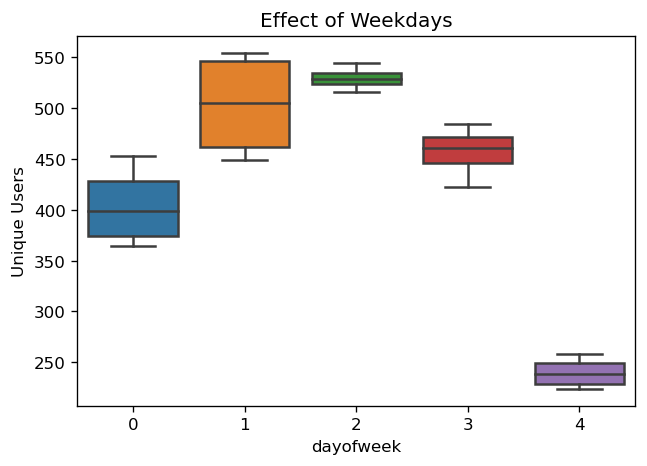

In [231]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=ts, x='dayofweek', y='Unique Users')
ax.set_title('Effect of Weekdays')
plt.show()

## Model

In [232]:
# Train test split

train = ts.loc[ts.index < '2023-02-20']
test = ts.loc[ts.index >= '2023-02-20']

FEATURES = ['dayofweek']
TARGET = 'Unique Users'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

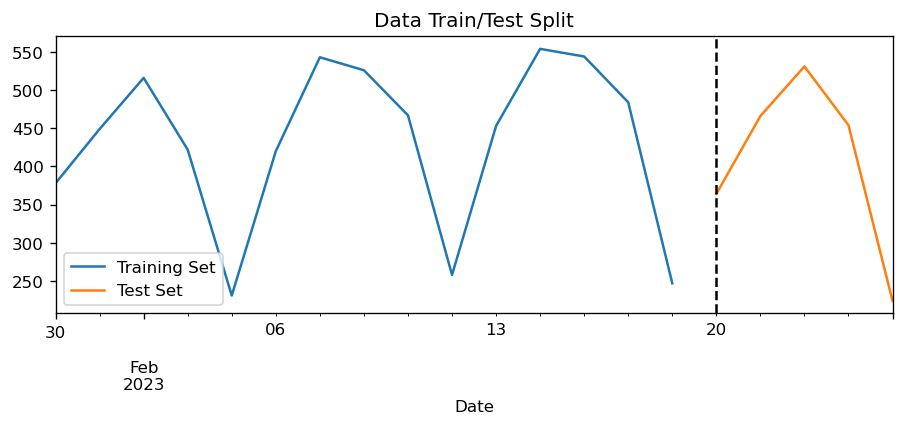

In [233]:
fig, ax = plt.subplots(figsize=(9, 3))
y_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Set')
ax.axvline('2023-02-20', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [234]:
reg = xgb.XGBRegressor(n_estimators=400, learning_rate=0.01)

In [235]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:441.08078	validation_1-rmse:416.91486
[100]	validation_0-rmse:182.40433	validation_1-rmse:159.81275
[200]	validation_0-rmse:82.20001	validation_1-rmse:60.94927
[300]	validation_0-rmse:43.91413	validation_1-rmse:29.86778
[399]	validation_0-rmse:32.33737	validation_1-rmse:29.19967


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [236]:
# Forecast on test

test['prediction'] = reg.predict(X_test)
ts = ts.merge(test[['prediction']], how='left', left_index=True, right_index=True)

C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\1376732270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


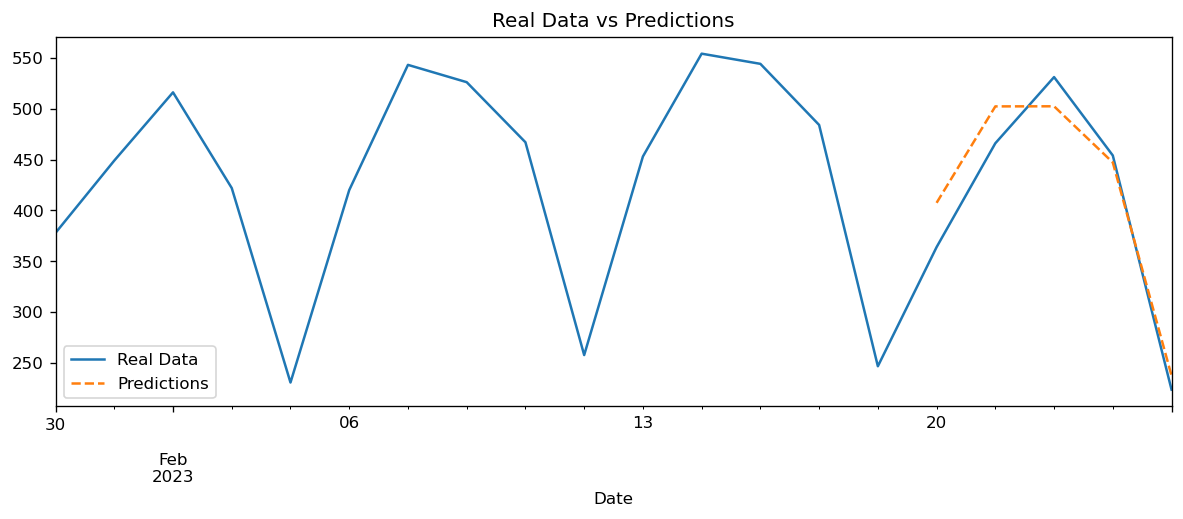

In [237]:
ax = ts[['Unique Users']].plot(figsize=(12, 4))
ts['prediction'].dropna().plot(ax=ax, style='--')
plt.legend(['Real Data', 'Predictions'])
ax.set_title('Real Data vs Predictions')
plt.show()

In [238]:
# Training with all data and predicting the next week

range_date = pd.date_range(start='27/2/2023', end ='3/3/2023',
                                              freq ='D')
 
next_week = pd.DataFrame(range_date, columns=['date'])
next_week['Unique Users'] = np.NaN
 
print(next_week.head())

        date  Unique Users
0 2023-02-27           NaN
1 2023-02-28           NaN
2 2023-03-01           NaN
3 2023-03-02           NaN
4 2023-03-03           NaN


C:\Users\ayigi\AppData\Local\Temp\ipykernel_13608\405317220.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  range_date = pd.date_range(start='27/2/2023', end ='3/3/2023',


In [239]:
next_week = next_week.set_index("date")
next_week.index = pd.to_datetime(next_week.index)
next_week["dayofweek"] = next_week.index.dayofweek
X_next_week = next_week[FEATURES]

In [240]:
X_ts = ts[FEATURES]
y_ts = ts[TARGET]

In [241]:
reg.fit(X_ts, y_ts)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [242]:
next_week['prediction'] = reg.predict(X_next_week)
ts = ts.merge(test[['prediction']], how='left', left_index=True, right_index=True)

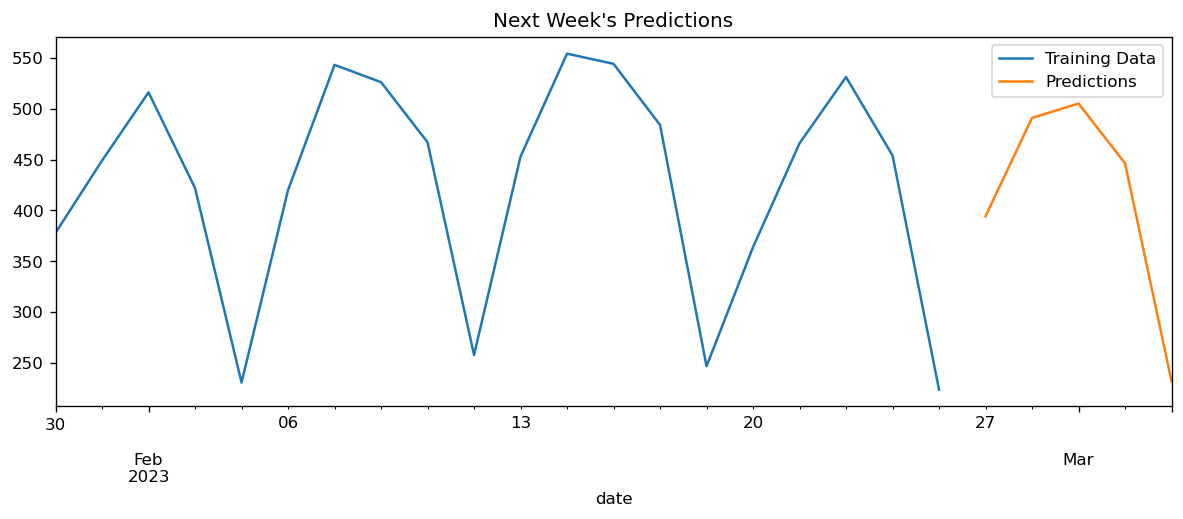

In [243]:
ax = ts[['Unique Users']].plot(figsize=(12, 4))
next_week['prediction'].plot(ax=ax, style='-')
plt.legend(['Training Data', 'Predictions'])
ax.set_title("Next Week's Predictions")
plt.show()

In [244]:
next_week

,Unique Users,dayofweek,prediction
date,,,
2023-02-27,NaN,0,394.273010
2023-02-28,NaN,1,490.891113
2023-03-01,NaN,2,505.008423
2023-03-02,NaN,3,446.290070
2023-03-03,NaN,4,232.288803
